In [51]:
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import warnings
from sklearn.preprocessing import MinMaxScaler


In [52]:
dataFrame=pd.read_csv('data/Covid19USA.csv')
import datetime as dt
dataFrame['date'] = pd.to_datetime(dataFrame['date'])
dataFrame['date']=dataFrame['date'].map(dt.datetime.toordinal)

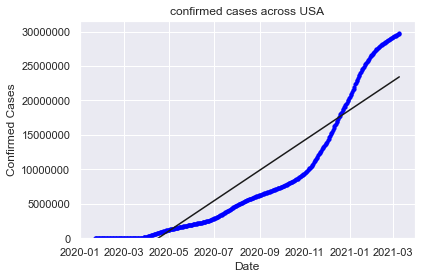

In [53]:
df1 = dataFrame[['date','confirmed']]
df1=df1.groupby(['date'])['confirmed'].sum().reset_index()
df1=df1[df1['confirmed']>=0]
x1=df1.drop('confirmed',axis=1)
x=df1.drop('confirmed',axis=1)
trans = MinMaxScaler()
x = trans.fit_transform(x)
y=df1['confirmed']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
plt.scatter(x1['date'].map(dt.datetime.fromordinal), y,color='blue', s=10)
plt.plot(x1['date'].map(dt.datetime.fromordinal), model.predict(x),color='k')
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title('confirmed cases across USA')
plt.ylim(bottom=0)
plt.ticklabel_format(style='plain', axis='y')

In [54]:
x1['date'].map(dt.datetime.fromordinal)

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
409   2021-03-05
410   2021-03-06
411   2021-03-07
412   2021-03-08
413   2021-03-09
Name: date, Length: 414, dtype: datetime64[ns]

In [55]:
#check the score
acc=model.score(X_test,y_test)
print("Accuracy score:","{0:.2f}".format(acc))

Accuracy score: 0.84


In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8456359.059642652
MSE: 156647577669156.2
RMSE: 12515893.003264137


Here we create a linear regression model to predict the number of deaths in future across USA

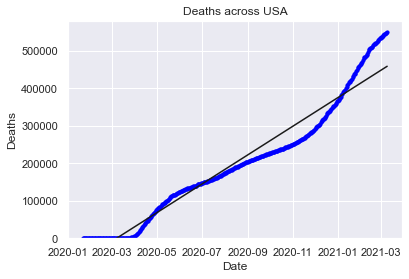

In [57]:
df1 = dataFrame[['date','deaths']]
df1=df1.groupby(['date'])['deaths'].sum().reset_index()
df1=df1[df1['deaths']>=0]
x1=df1.drop('deaths',axis=1)
x=df1.drop('deaths',axis=1)
trans = MinMaxScaler()
x = trans.fit_transform(x)
y=df1['deaths']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
plt.scatter(x1['date'].map(dt.datetime.fromordinal), y,color='blue', s=10)
plt.plot(x1['date'].map(dt.datetime.fromordinal), model.predict(x),color='k')
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title('Deaths across USA')
plt.ylim(bottom=0)
plt.ticklabel_format(style='plain', axis='y')

In [58]:
acc_score=model.score(X_test,y_test)
print("Accuracy score:","{0:.2f}".format(acc_score))

Accuracy score: 0.95


In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 182325.96904080856
MSE: 52683642480.252754
RMSE: 229529.1756623823
